In [231]:
import numpy as np
import pandas as pd

In [232]:
df=pd.read_csv("Train.csv")

In [233]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [234]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [235]:
x.shape,y.shape

((1600, 5), (1600,))

In [236]:
x[:,3].mean()

-0.042407919903067984

In [237]:
w=np.ones(1600)
x=np.vstack((w,x.T)).T

In [238]:
x.shape

(1600, 6)

In [239]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)

In [240]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1280, 6), (1280,), (320, 6), (320,))

In [241]:
x_train[1:10]

array([[ 1.        ,  1.4977728 , -0.65315596, -0.92674519, -0.52228622,
         1.28888668],
       [ 1.        ,  1.63864168, -2.91259073,  0.84421918,  0.29554059,
        -1.47931927],
       [ 1.        ,  1.14986223, -0.8348774 ,  0.1787837 ,  0.50931853,
        -0.63854696],
       [ 1.        , -0.40666741, -0.50813559, -1.07109549,  1.10441849,
         1.20289698],
       [ 1.        ,  0.59018772,  0.05416055,  0.38909294,  0.62076408,
        -0.15002468],
       [ 1.        , -0.82470704,  0.49942691,  1.29328064, -0.24067071,
        -0.41913554],
       [ 1.        ,  0.23061763, -0.36944146, -2.0737901 ,  0.44305631,
         0.94075672],
       [ 1.        ,  0.34279221, -1.14143048,  0.04855499,  0.03782617,
        -0.4546623 ],
       [ 1.        ,  0.58314137, -1.10805603,  0.25500507, -1.21562443,
        -1.1041556 ]])

In [242]:
def hypothesis(x,theta):
    return np.dot(theta,x)
def error(x,y,theta):
    m=x.shape[0]
    error=0
    for i in range(m):
        hx=hypothesis(x[i],theta)
        error+=(hx-y[i])**2
    return error

def gradient(x,y,theta):
    col=x_train.shape[1]
    grad=np.zeros((col,))
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        for j in range(col):
            grad[j]+=(hx-y[i])*x[i][j]
    return grad
def gradientDecent(x,y,learning_rate=0.0001):
    col=x_train.shape[1]
    theta=np.zeros((col,))
    itr=0
    max_itr=200
    error_list=[]
    while(itr<=max_itr):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        error_list.append(e)
        for k in range(col):
            theta[k]=theta[k]-learning_rate*grad[k]
        itr+=1
    return theta,error_list

In [243]:
final_theta,error_list=gradientDecent(x_train,x_test)

In [244]:
import matplotlib.pyplot as plt

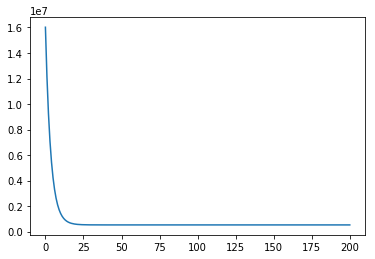

In [245]:
plt.plot(error_list)

In [246]:
error_list

[16017334.251436764,
 12147906.85445774,
 9249643.127590464,
 7077712.28341911,
 5449262.1433055885,
 4227668.67322797,
 3310802.4649012242,
 2622284.314928643,
 2104965.855347175,
 1716067.0959865197,
 1423548.2705838156,
 1203401.5220547412,
 1037628.3488284453,
 912728.5077474108,
 818570.5303714089,
 747547.0926360702,
 693943.1032879945,
 653462.713208669,
 622875.1067532427,
 599749.1147260645,
 582254.2764448673,
 569011.6371568502,
 558981.7889934864,
 551380.8148581742,
 545617.1476786507,
 541244.1152585461,
 537924.2546870562,
 535402.4625460744,
 533485.7819511482,
 532028.1773878381,
 530919.0600686915,
 530074.6349998979,
 529431.3721399489,
 528941.0773993188,
 528567.1693000349,
 528281.8647510714,
 528064.0507249428,
 527897.6737239849,
 527770.5203538594,
 527673.2934871617,
 527598.9119573218,
 527541.9793883534,
 527498.3810771666,
 527464.9778808773,
 527439.3736321392,
 527419.7383198416,
 527404.6735880807,
 527393.1103675126,
 527384.2309189306,
 527377.40943440

In [247]:
a=[]
for i in range(y_train.shape[0]):
    a.append(hypothesis(final_theta,y_train[i]))

In [248]:
from sklearn.metrics import r2_score
r2_score(y_test, a)

0.9614133631905548

In [263]:
test=pd.read_csv("test.csv")
test=test.values
test[:5]

array([[ 1.01525387,  2.07620944, -0.26643482, -2.4180882 , -0.98050279],
       [-0.3750212 ,  0.95318453,  0.62671914,  0.70440575, -0.35548921],
       [-1.02445225,  0.96299111, -0.407942  , -1.86127383,  0.45520135],
       [-2.4898408 ,  0.54480173,  0.6012189 , -0.60702147, -1.31428633],
       [-0.38467471, -0.83362421,  1.35855215, -0.54793205,  0.41192542]])

In [257]:
test.shape

(400, 5)

In [258]:
w=np.ones(400)
test=np.vstack((w,test.T)).T

In [259]:
test.shape

(400, 6)

In [260]:
c=[]
for i in range(test.shape[0]):
    c.append(hypothesis(final_theta,test[i]))

In [264]:
len(c)

400

In [265]:
t=pd.DataFrame(c)
t.to_csv("predicted.csv")